In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#import optuna
#import optuna.visualization as vis
#import time

In [1]:
import sys
print(sys.executable)


/Users/carlescampdepadrosmartin/outside_cloud/Bootcamp/Final Project/final_project/bin/python


In [43]:
airbnb = pd.read_csv("../data/clean/airbnb_merged.csv")
airbnb

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,weekend,city
0,194.033698,Private room,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,False,Amsterdam
1,344.245776,Private room,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,False,Amsterdam
2,264.101422,Private room,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,False,Amsterdam
3,433.529398,Private room,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,False,Amsterdam
4,485.552926,Private room,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,False,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,438.756874,True,Vienna
51703,304.793960,Entire home/apt,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,342.182813,True,Vienna
51704,637.168969,Entire home/apt,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,282.296424,True,Vienna
51705,301.054157,Private room,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,158.563398,True,Vienna


# Feature Engineering

In [44]:
numerical_columns = airbnb[[ "cleanliness_rating", "guest_satisfaction_overall", 
                            "dist", "metro_dist", "attr_index", "rest_index"]]

normalizer = MinMaxScaler()
num_norm = normalizer.fit_transform(numerical_columns)
df_norm = pd.DataFrame(num_norm, columns=numerical_columns.columns, index=airbnb.index)
df_norm

,cleanliness_rating,guest_satisfaction_overall,dist,metro_dist,attr_index,rest_index
0,1.000,0.9125,0.198180,0.177775,0.014125,0.011784
1,0.750,0.8125,0.018732,0.016614,0.136943,0.122473
2,0.875,0.8375,0.226885,0.255711,0.013366,0.011355
3,0.875,0.8750,0.014635,0.030661,0.106286,0.128128
4,1.000,0.9750,0.020962,0.022170,0.119526,0.119182
...,...,...,...,...,...,...
51702,1.000,1.0000,0.020386,0.009330,0.045405,0.062784
51703,0.750,0.8250,0.031467,0.006905,0.042197,0.048319
51704,1.000,0.9125,0.038743,0.014031,0.034217,0.039349
51705,1.000,0.8375,0.119870,0.019980,0.020915,0.020817


In [45]:
categorical_nominal = airbnb[["room_type" , "host_is_superhost", "multi", 
                            "biz", "weekend", "city"]]

ohe = OneHotEncoder(sparse_output=False)

ohe.fit(categorical_nominal)
dummies= ohe.transform(categorical_nominal)

dummies_df = pd.DataFrame(dummies, columns=ohe.get_feature_names_out(), index=airbnb.index)
dummies_df

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_False,host_is_superhost_True,multi_0,multi_1,biz_0,biz_1,weekend_False,...,city_Amsterdam,city_Athens,city_Barcelona,city_Berlin,city_Budapest,city_Lisbon,city_London,city_Paris,city_Rome,city_Vienna
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51703,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51704,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51705,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
non_transform = airbnb[["realSum", "person_capacity", "bedrooms"]].copy()  
non_transform["realSum"] = np.log1p(non_transform["realSum"])
non_transform["person_capacity"] = non_transform["person_capacity"].astype(int)
non_transform

,realSum,person_capacity,bedrooms
0,5.273172,2,1
1,5.844257,4,1
2,5.580112,2,1
3,6.074264,4,2
4,6.187346,2,1
...,...,...,...
51702,6.574990,6,3
51703,5.722912,2,1
51704,6.458603,2,1
51705,5.710606,2,1


In [47]:
final_df = pd.concat([non_transform, df_norm, dummies_df], axis=1)
final_df

,realSum,person_capacity,bedrooms,cleanliness_rating,guest_satisfaction_overall,dist,metro_dist,attr_index,rest_index,room_type_Entire home/apt,...,city_Amsterdam,city_Athens,city_Barcelona,city_Berlin,city_Budapest,city_Lisbon,city_London,city_Paris,city_Rome,city_Vienna
0,5.273172,2,1,1.000,0.9125,0.198180,0.177775,0.014125,0.011784,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.844257,4,1,0.750,0.8125,0.018732,0.016614,0.136943,0.122473,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.580112,2,1,0.875,0.8375,0.226885,0.255711,0.013366,0.011355,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.074264,4,2,0.875,0.8750,0.014635,0.030661,0.106286,0.128128,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.187346,2,1,1.000,0.9750,0.020962,0.022170,0.119526,0.119182,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,6.574990,6,3,1.000,1.0000,0.020386,0.009330,0.045405,0.062784,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51703,5.722912,2,1,0.750,0.8250,0.031467,0.006905,0.042197,0.048319,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51704,6.458603,2,1,1.000,0.9125,0.038743,0.014031,0.034217,0.039349,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51705,5.710606,2,1,1.000,0.8375,0.119870,0.019980,0.020915,0.020817,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Models

## Price

In [48]:
features = final_df.drop(columns = ["realSum", "rest_index", "guest_satisfaction_overall"])
target = final_df["realSum"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

### Linear Regression

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred_test = lin_reg.predict(X_test)


print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") 
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") 
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") 
print(f"R2 score, {lin_reg.score(X_test, y_test): .2f}")

MAE  0.26
MSE  0.12
RMSE,  0.35
R2 score,  0.65


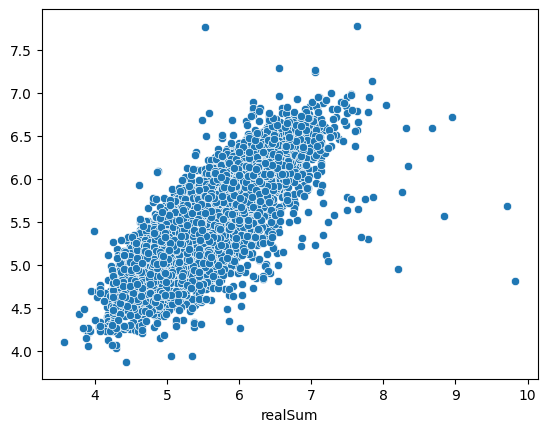

In [51]:
sns.scatterplot(x=y_test, y=y_pred_test);

### Decision Tree

In [52]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)
y_pred_test_dt = tree.predict(X_test)

In [53]:
print(f"MAE, {mean_absolute_error(y_pred_test_dt, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"R2 score, {tree.score(X_test, y_test): .2f}")

MAE,  0.24
MSE,  0.11
RMSE,  0.33
R2 score,  0.68


### Bagging

In [54]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)
bagging_reg.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [55]:
y_pred_test_bag = bagging_reg.predict(X_test)

print(f"MAE {mean_absolute_error(y_pred_test_bag, y_test): .2f}")
print(f"MSE {mean_squared_error(y_pred_test_bag, y_test): .2f}")
print(f"RMSE {root_mean_squared_error(y_pred_test_bag, y_test): .2f}")
print(f"R2 score {bagging_reg.score(X_test, y_test): .2f}")

MAE  0.24
MSE  0.10
RMSE  0.32
R2 score  0.70


### Random Forest

In [56]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [57]:
y_pred_test_rf = forest.predict(X_test)

print(f"MAE, {mean_absolute_error(y_pred_test_rf, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_rf, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_rf, y_test): .2f}")
print(f"R2 score, {forest.score(X_test, y_test): .2f}")

MAE,  0.17
MSE,  0.06
RMSE,  0.25
R2 score,  0.83


### Ada Boosting

In [58]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [59]:
y_pred_test_ada = ada_reg.predict(X_test)

print(f"MAE, {mean_absolute_error(y_pred_test_ada, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_ada, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_ada, y_test): .2f}")
print(f"R2 score, {ada_reg.score(X_test, y_test): .2f}")

MAE,  0.14
MSE,  0.05
RMSE,  0.22
R2 score,  0.86


### Gradient Boosting

In [24]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=20)

In [25]:
y_pred_test_gb = gb_reg.predict(X_test)

print(f"MAE, {mean_absolute_error(y_pred_test_gb, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_gb, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_gb, y_test): .2f}")
print(f"R2 score, {gb_reg.score(X_test, y_test): .2f}")

MAE,  0.14
MSE,  0.06
RMSE,  0.25
R2 score,  0.81


## Client Satisfaction

In [60]:
features = final_df.drop(columns = ["realSum","rest_index", "guest_satisfaction_overall"])
target = final_df["guest_satisfaction_overall"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

### Linear Regression

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred_test = lin_reg.predict(X_test)


print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") 
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") 
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") 
print(f"R2 score, {lin_reg.score(X_test, y_test): .2f}")

MAE  0.05
MSE  0.01
RMSE,  0.08
R2 score,  0.54


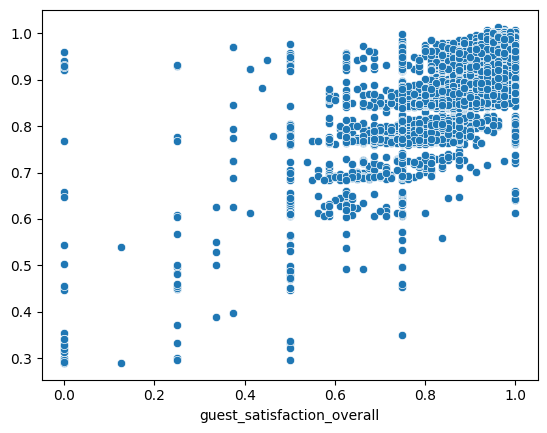

In [63]:
sns.scatterplot(x=y_test, y=y_pred_test);

### Decision Tree

In [64]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)
y_pred_test_dt = tree.predict(X_test)

In [65]:
print(f"MAE, {mean_absolute_error(y_pred_test_dt, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"R2 score, {tree.score(X_test, y_test): .2f}")

MAE,  0.05
MSE,  0.01
RMSE,  0.07
R2 score,  0.57


### Bagging

In [66]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)
bagging_reg.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [67]:
y_pred_test_bag = bagging_reg.predict(X_test)

print(f"MAE {mean_absolute_error(y_pred_test_bag, y_test): .2f}")
print(f"MSE {mean_squared_error(y_pred_test_bag, y_test): .2f}")
print(f"RMSE {root_mean_squared_error(y_pred_test_bag, y_test): .2f}")
print(f"R2 score {bagging_reg.score(X_test, y_test): .2f}")

MAE  0.05
MSE  0.01
RMSE  0.07
R2 score  0.56


### Random Forest

In [68]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [69]:
y_pred_test_rf = forest.predict(X_test)

print(f"MAE, {mean_absolute_error(y_pred_test_rf, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_rf, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_rf, y_test): .2f}")
print(f"R2 score, {forest.score(X_test, y_test): .2f}")

MAE,  0.04
MSE,  0.00
RMSE,  0.06
R2 score,  0.73


### Ada Boosting

In [70]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [71]:
y_pred_test_ada = ada_reg.predict(X_test)

print(f"MAE, {mean_absolute_error(y_pred_test_ada, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_ada, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_ada, y_test): .2f}")
print(f"R2 score, {ada_reg.score(X_test, y_test): .2f}")

MAE,  0.03
MSE,  0.00
RMSE,  0.05
R2 score,  0.79


### Gradient Boosting

In [72]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=20)

In [73]:
y_pred_test_gb = gb_reg.predict(X_test)

print(f"MAE, {mean_absolute_error(y_pred_test_gb, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_gb, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_gb, y_test): .2f}")
print(f"R2 score, {gb_reg.score(X_test, y_test): .2f}")

MAE,  0.03
MSE,  0.00
RMSE,  0.05
R2 score,  0.76


# Hyperparameter Tuning